In [2]:
import random
import time
import tracemalloc
import matplotlib.pyplot as plt
from random import sample


In [3]:
random.seed(1)
sequence = [i for i in range(100000)]
random.shuffle(sequence)
#print(sequence)

In [4]:

class Node:

	# Constructor to create a new node
	def __init__(self, key):
		self.key = key
		self.left = None
		self.right = None

# A utility function to do inorder traversal
def inorder(root):
	if root is not None:
		inorder(root.left)
		print(root.key, end=" ")
		inorder(root.right)

# A utility function to insert a new node with given key 
def insert(node, key):

	# If the tree is empty, return a new node
	if node is None:
		return Node(key)

	# Otherwise recur down the tree
	if key < node.key:
		node.left = insert(node.left, key)
	else:
		node.right = insert(node.right, key)

	# return the (unchanged) node pointer
	return node


# Given a binary tree and a key, this function delete the key and returns the new root
def deleteNode(root, key):

	# Base Case
	if root is None:
		return root

	# Recursive calls for ancestors of node to be deleted
	if key < root.key:
		root.left = deleteNode(root.left, key)
		return root

	elif(key > root.key):
		root.right = deleteNode(root.right, key)
		return root

	# We reach here when root is the node to be deleted.
	
	# If root node is a leaf node
	
	if root.left is None and root.right is None:
		return None

	# If one of the children is empty

	if root.left is None:
		temp = root.right
		root = None
		return temp

	elif root.right is None:
		temp = root.left
		root = None
		return temp

	# If both children exist

	succParent = root

	# Find Successor

	succ = root.right

	while succ.left != None:
		succParent = succ
		succ = succ.left

	# Delete successor.Since successor is always left child of its parent
	# we can safely make successor's right right child as left of its parent.
	# If there is no succ, then assign succ->right to succParent->right
	if succParent != root:
		succParent.left = succ.right
	else:
		succParent.right = succ.right

	# Copy Successor Data to root

	root.key = succ.key

	return root


In [5]:
root = None
for i in range(len(sequence)):
    root = insert(root, sequence[i])
inorder(root)

6 96667 96668 96669 96670 96671 96672 96673 96674 96675 96676 96677 96678 96679 96680 96681 96682 96683 96684 96685 96686 96687 96688 96689 96690 96691 96692 96693 96694 96695 96696 96697 96698 96699 96700 96701 96702 96703 96704 96705 96706 96707 96708 96709 96710 96711 96712 96713 96714 96715 96716 96717 96718 96719 96720 96721 96722 96723 96724 96725 96726 96727 96728 96729 96730 96731 96732 96733 96734 96735 96736 96737 96738 96739 96740 96741 96742 96743 96744 96745 96746 96747 96748 96749 96750 96751 96752 96753 96754 96755 96756 96757 96758 96759 96760 96761 96762 96763 96764 96765 96766 96767 96768 96769 96770 96771 96772 96773 96774 96775 96776 96777 96778 96779 96780 96781 96782 96783 96784 96785 96786 96787 96788 96789 96790 96791 96792 96793 96794 96795 96796 96797 96798 96799 96800 96801 96802 96803 96804 96805 96806 96807 96808 96809 96810 96811 96812 96813 96814 96815 96816 96817 96818 96819 96820 96821 96822 96823 96824 96825 96826 96827 96828 96829 96830 96831 96832 96

In [6]:
def complexity(data, num):
    root = data
    start = time.time()
    tracemalloc.start()
    for i in range(num):
        root = deleteNode(root, i+10)
    end = time.time()
    runtime = end - start
    current, peak = tracemalloc.get_traced_memory()
    usage = current / 10**6
    print(f"Current memory usage is {usage}MB; Peak was {peak / 10**6}MB")
    tracemalloc.stop()
    print(f"Runtime of the snippet is {runtime}")
    return runtime, usage

In [7]:
cost = []
seqRange = [50,100,500,1000,5000,10000,50000,100000]
for i in range(8):
     print(f"{i+1}: for {seqRange[i]} items\n --------------------")
     cost.append(complexity(root,seqRange[i]))
runtime, usage =  map(list, zip(*cost))

1: for 50 items
 --------------------
Current memory usage is 0.002736MB; Peak was 0.002736MB
Runtime of the snippet is 0.0009965896606445312
2: for 100 items
 --------------------
Current memory usage is 0.000169MB; Peak was 0.000201MB
Runtime of the snippet is 0.0
3: for 500 items
 --------------------
Current memory usage is 2.8e-05MB; Peak was 0.000112MB
Runtime of the snippet is 0.001993894577026367
4: for 1000 items
 --------------------
Current memory usage is 2.8e-05MB; Peak was 0.000112MB
Runtime of the snippet is 0.002995014190673828
5: for 5000 items
 --------------------
Current memory usage is 0.000283MB; Peak was 0.000343MB
Runtime of the snippet is 0.02293848991394043
6: for 10000 items
 --------------------
Current memory usage is 0.00047MB; Peak was 0.000552MB
Runtime of the snippet is 0.037462711334228516
7: for 50000 items
 --------------------
Current memory usage is 0.0089MB; Peak was 0.010901MB
Runtime of the snippet is 0.19961905479431152
8: for 100000 items
 ---

Text(0.5, 1.0, 'Runtime')

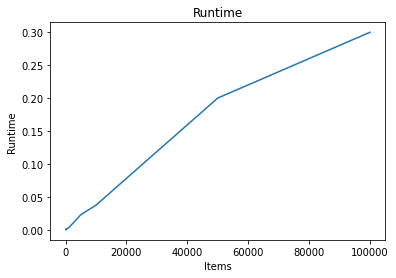

In [18]:
fig, ax = plt.subplots()  
ax.plot(seqRange, runtime, label='Runtime')  
ax.set_xlabel('Items')  
ax.set_ylabel('Runtime')  
ax.set_title("Runtime") 

Text(0.5, 1.0, 'Memory usage')

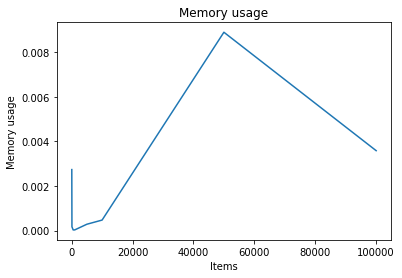

In [19]:
fig, ax = plt.subplots()  
ax.plot(seqRange, usage, label='Memory usage')  
ax.set_xlabel('Items')  
ax.set_ylabel('Memory usage')  
ax.set_title("Memory usage") 